In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [76]:
# Load filtered ICU data with mortality label
icu_path = Path("_rts/mlops/mimiccds/real_mimic/output/icu_labeled.csv")
icu_df = pd.read_csv(icu_path, parse_dates=["intime", "outtime"])


In [78]:
icu_df.head(3)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,icu_los_hours,admittime,dischtime,dod,mortality_30d,anchor_age
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,9.846389,NaN,NaN,NaN,NaN,NaN
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,11.940833,NaN,NaN,NaN,NaN,NaN
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,26.832778,2157-11-18 22:56:00,2157-11-25 18:00:00,NaN,0.0,55.0


In [79]:
# Drop NA for clean plotting
icu_df = icu_df.dropna(subset=["icu_los_hours", "mortality_30d"])


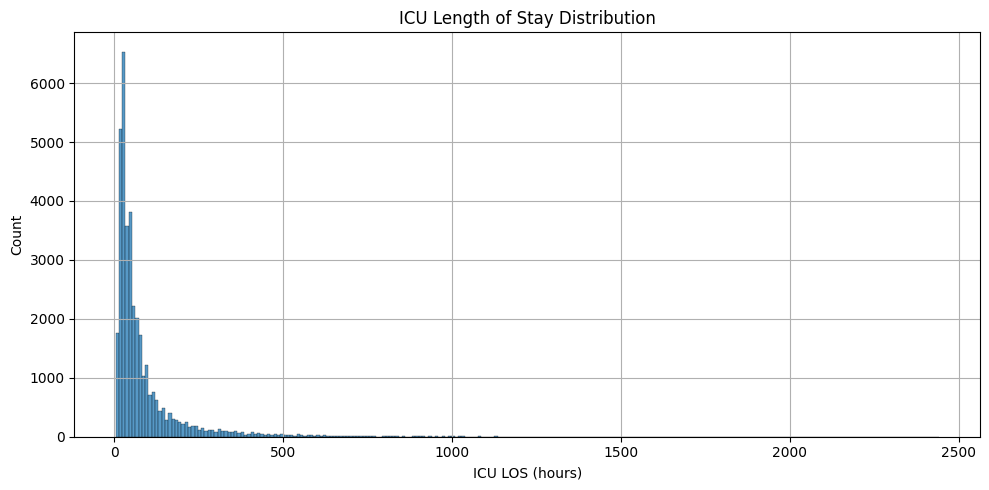

In [84]:
# Plot 1 – Histogram of ICU Length of Stay
plt.figure(figsize=(10, 5))
sns.histplot(icu_df["icu_los_hours"], bins=250, kde=False)
plt.title("ICU Length of Stay Distribution")
plt.xlabel("ICU LOS (hours)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


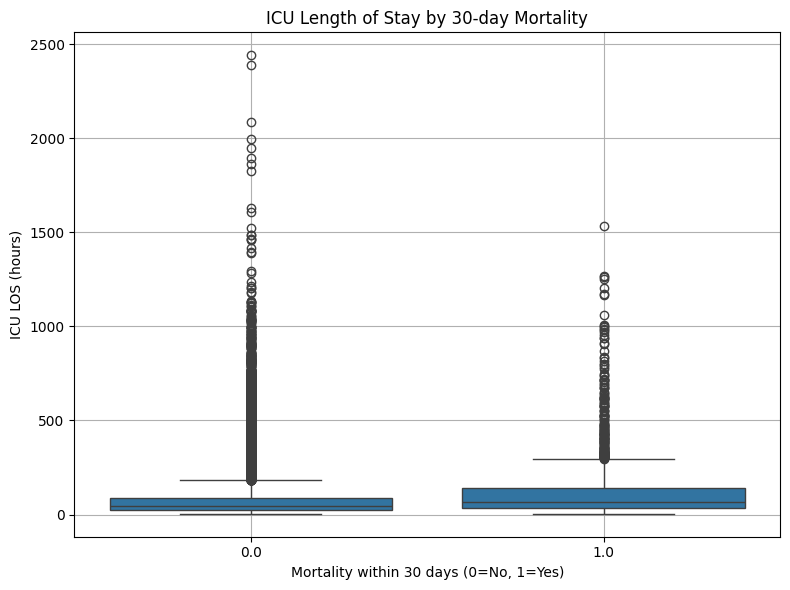

In [81]:
# Plot 2 – ICU LOS by Mortality Label
plt.figure(figsize=(8, 6))
sns.boxplot(data=icu_df, x="mortality_30d", y="icu_los_hours")
plt.title("ICU Length of Stay by 30-day Mortality")
plt.xlabel("Mortality within 30 days (0=No, 1=Yes)")
plt.ylabel("ICU LOS (hours)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# Optional: Save cleaned output again
icu_df.to_csv("_rts/mlops/mimiccds/real_mimic/output/icu_labeled.csv", index=False)